In [1]:
import sys
from pathlib import Path
portfolio_management_path = Path.cwd().parent
sys.path.insert(0, str(portfolio_management_path))

In [2]:
import xarray as xr
import numpy as np
import pandas as pd

In [3]:
from portfolio_management.database.manager import Manager
from portfolio_management.database.retrieve import get_dataframe

database_name = 'test_feature'

symbol_list = ["ETHBTC"]
interval = '5m'
start = "2021-01-01"
end = "2021-03-01"

manager = Manager(
    database_name=database_name,
    echo=False,
    reset_tables=True
)
manager.insert(
    symbol_list=symbol_list,
    interval=interval,
    start=start,
    end=end,
)

D:\Thomas\GitHub\portfolio-management\databases
sqlite:///D:\Thomas\GitHub\portfolio-management\databases\test_feature.db
db created
Config saved


In [4]:
df = get_dataframe(database_name='test_feature', symbol='ETHBTC', interval='5m')

In [5]:
def get_relative_change(value):
    return value.shift(1)/value

def get_relative_to(value, reference):
    return value/reference

# relative change
df['r_open'] = get_relative_change(df['open'])
df['r_close'] = get_relative_change(df['close'])
df['r_high'] = get_relative_change(df['high'])
df['r_low'] = get_relative_change(df['low'])

# relative to open
df['rto_close'] = get_relative_to(df['close'], df['open'])
df['rto_low'] = get_relative_to(df['low'], df['open'])
df['rto_high'] = get_relative_to(df['high'], df['open'])

df

,open,open_time,low,volume,quote_asset_volume,taker_buy_quote_asset_volume,high,close_time,close,number_of_trades,taker_buy_base_asset_volume,r_open,r_close,r_high,r_low,rto_close,rto_low,rto_high
0,0.025464,2021-01-01 00:00:00,0.025427,1507.244,38.364181,15.995863,0.025479,2021-01-01 00:05:00,0.025436,668.0,628.523,NaN,NaN,NaN,NaN,0.998900,0.998547,1.000589
1,0.025440,2021-01-01 00:05:00,0.025389,860.063,21.854359,9.630976,0.025452,2021-01-01 00:10:00,0.025397,531.0,379.048,1.000943,1.001536,1.001061,1.001497,0.998310,0.997995,1.000472
2,0.025399,2021-01-01 00:10:00,0.025383,798.925,20.305696,9.088219,0.025452,2021-01-01 00:15:00,0.025426,736.0,357.549,1.001614,0.998859,1.000000,1.000236,1.001063,0.999370,1.002087
3,0.025430,2021-01-01 00:15:00,0.025375,1041.243,26.449582,7.387753,0.025433,2021-01-01 00:20:00,0.025379,612.0,290.760,0.998781,1.001852,1.000747,1.000315,0.997994,0.997837,1.000118
4,0.025382,2021-01-01 00:20:00,0.025366,442.481,11.229150,4.804514,0.025396,2021-01-01 00:25:00,0.025368,558.0,189.328,1.001891,1.000434,1.001457,1.000355,0.999448,0.999370,1.000552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16973,0.031460,2021-02-28 23:40:00,0.031372,414.093,13.013622,7.097499,0.031494,2021-02-28 23:45:00,0.031388,793.0,225.869,1.000795,1.002644,1.000349,1.001307,0.997711,0.997203,1.001081
16974,0.031387,2021-02-28 23:45:00,0.031339,943.247,29.610370,14.789903,0.031445,2021-02-28 23:50:00,0.031351,1131.0,471.051,1.002326,1.001180,1.001558,1.001053,0.998853,0.998471,1.001848
16975,0.031352,2021-02-28 23:50:00,0.031316,1061.543,33.299048,14.858739,0.031420,2021-02-28 23:55:00,0.031362,1143.0,473.565,1.001116,0.999649,1.000796,1.000734,1.000319,0.998852,1.002169
16976,0.031364,2021-02-28 23:55:00,0.031335,1559.008,48.959160,38.173242,0.031440,2021-03-01 00:00:00,0.031440,1050.0,1215.344,0.999617,0.997519,0.999364,0.999394,1.002423,0.999075,1.002423


In [6]:
df[['open_s', 'low_s', 'close_s', 'high_s']] = df[['open', 'low', 'close', 'high']].shift(1)
nominator = np.array(df[['open_s', 'low_s', 'close_s', 'high_s', 'open', 'low', 'close', 'high']])
denominator = np.array(df[['open', 'low', 'close', 'high']])

nominator = np.nan_to_num(nominator, nan=0.0)
denominator = np.nan_to_num(denominator, nan=0.0)

epsilon = 10e-9
nominator = nominator + epsilon
denominator = denominator + epsilon

nominator

array([[1.000000e-08, 1.000000e-08, 1.000000e-08, ..., 2.542701e-02,
        2.543601e-02, 2.547901e-02],
       [2.546401e-02, 2.542701e-02, 2.543601e-02, ..., 2.538901e-02,
        2.539701e-02, 2.545201e-02],
       [2.544001e-02, 2.538901e-02, 2.539701e-02, ..., 2.538301e-02,
        2.542601e-02, 2.545201e-02],
       ...,
       [3.138701e-02, 3.133901e-02, 3.135101e-02, ..., 3.131601e-02,
        3.136201e-02, 3.142001e-02],
       [3.135201e-02, 3.131601e-02, 3.136201e-02, ..., 3.133501e-02,
        3.144001e-02, 3.144001e-02],
       [3.136401e-02, 3.133501e-02, 3.144001e-02, ..., 3.141401e-02,
        3.141501e-02, 3.152601e-02]])

In [7]:
print(denominator.shape)
denominator[-1]

(16978, 4)


array([0.03144101, 0.03141401, 0.03141501, 0.03152601])

In [8]:
print(nominator.shape)
nominator[-1]

(16978, 8)


array([0.03136401, 0.03133501, 0.03144001, 0.03144001, 0.03144101,
       0.03141401, 0.03141501, 0.03152601])

In [9]:
nominator_ = np.reshape(np.repeat(nominator, 4), (-1,8,4))
print(nominator_.shape)
nominator_[-1]

(16978, 8, 4)


array([[0.03136401, 0.03136401, 0.03136401, 0.03136401],
       [0.03133501, 0.03133501, 0.03133501, 0.03133501],
       [0.03144001, 0.03144001, 0.03144001, 0.03144001],
       [0.03144001, 0.03144001, 0.03144001, 0.03144001],
       [0.03144101, 0.03144101, 0.03144101, 0.03144101],
       [0.03141401, 0.03141401, 0.03141401, 0.03141401],
       [0.03141501, 0.03141501, 0.03141501, 0.03141501],
       [0.03152601, 0.03152601, 0.03152601, 0.03152601]])

In [10]:
denominator_ = np.tile(np.expand_dims(denominator, axis=1), (1,8,1))
print(denominator_.shape)
denominator_[-1]

(16978, 8, 4)


array([[0.03144101, 0.03141401, 0.03141501, 0.03152601],
       [0.03144101, 0.03141401, 0.03141501, 0.03152601],
       [0.03144101, 0.03141401, 0.03141501, 0.03152601],
       [0.03144101, 0.03141401, 0.03141501, 0.03152601],
       [0.03144101, 0.03141401, 0.03141501, 0.03152601],
       [0.03144101, 0.03141401, 0.03141501, 0.03152601],
       [0.03144101, 0.03141401, 0.03141501, 0.03152601],
       [0.03144101, 0.03141401, 0.03141501, 0.03152601]])

In [11]:
new = nominator_/denominator_
new[-1]

array([[0.99755097, 0.99840835, 0.99837657, 0.99486139],
       [0.99662861, 0.9974852 , 0.99745345, 0.99394151],
       [0.99996819, 1.00082766, 1.0007958 , 0.99727209],
       [0.99996819, 1.00082766, 1.0007958 , 0.99727209],
       [1.        , 1.00085949, 1.00082763, 0.99730381],
       [0.99914125, 1.        , 0.99996817, 0.99644738],
       [0.99917305, 1.00003183, 1.        , 0.9964791 ],
       [1.00270348, 1.00356529, 1.00353334, 1.        ]])

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
features = new.reshape(new.shape[0], -1)

scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

In [14]:
pca = PCA(n_components=8)
pca.fit(scaled_features)

PCA(n_components=8)

In [15]:
pca.explained_variance_ratio_

array([5.46176221e-01, 2.08494338e-01, 1.91910212e-01, 3.91773561e-02,
       7.80777388e-03, 5.17702012e-03, 1.24886927e-03, 4.11483814e-06])

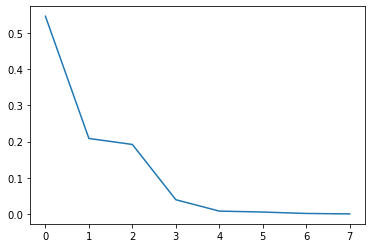

In [16]:
plt.plot(pca.explained_variance_ratio_)